## Springboard Data Science Track Capstone Project 1
### Histopathologic Cancer Detection
### by Morgan Fry
### Data Exploration notebook


In [1]:
#includes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

from matplotlib.image import imread
import cv2    

from sklearn.utils import shuffle
import pickle
import sys
import seaborn as sns

In [2]:
#load data saved in data wrangling notebook
y=pickle.load(open("y.p","rb"))
X=pickle.load(open("X.p","rb"))
X_vect=pickle.load(open("X_vect.p","rb"))
X_gray=pickle.load(open("X_gray.p","rb"))
X_gray_vect=pickle.load(open("X_gra_vect.p","rb"))

##### Let's look at a few of the samples, in color and in grayscale

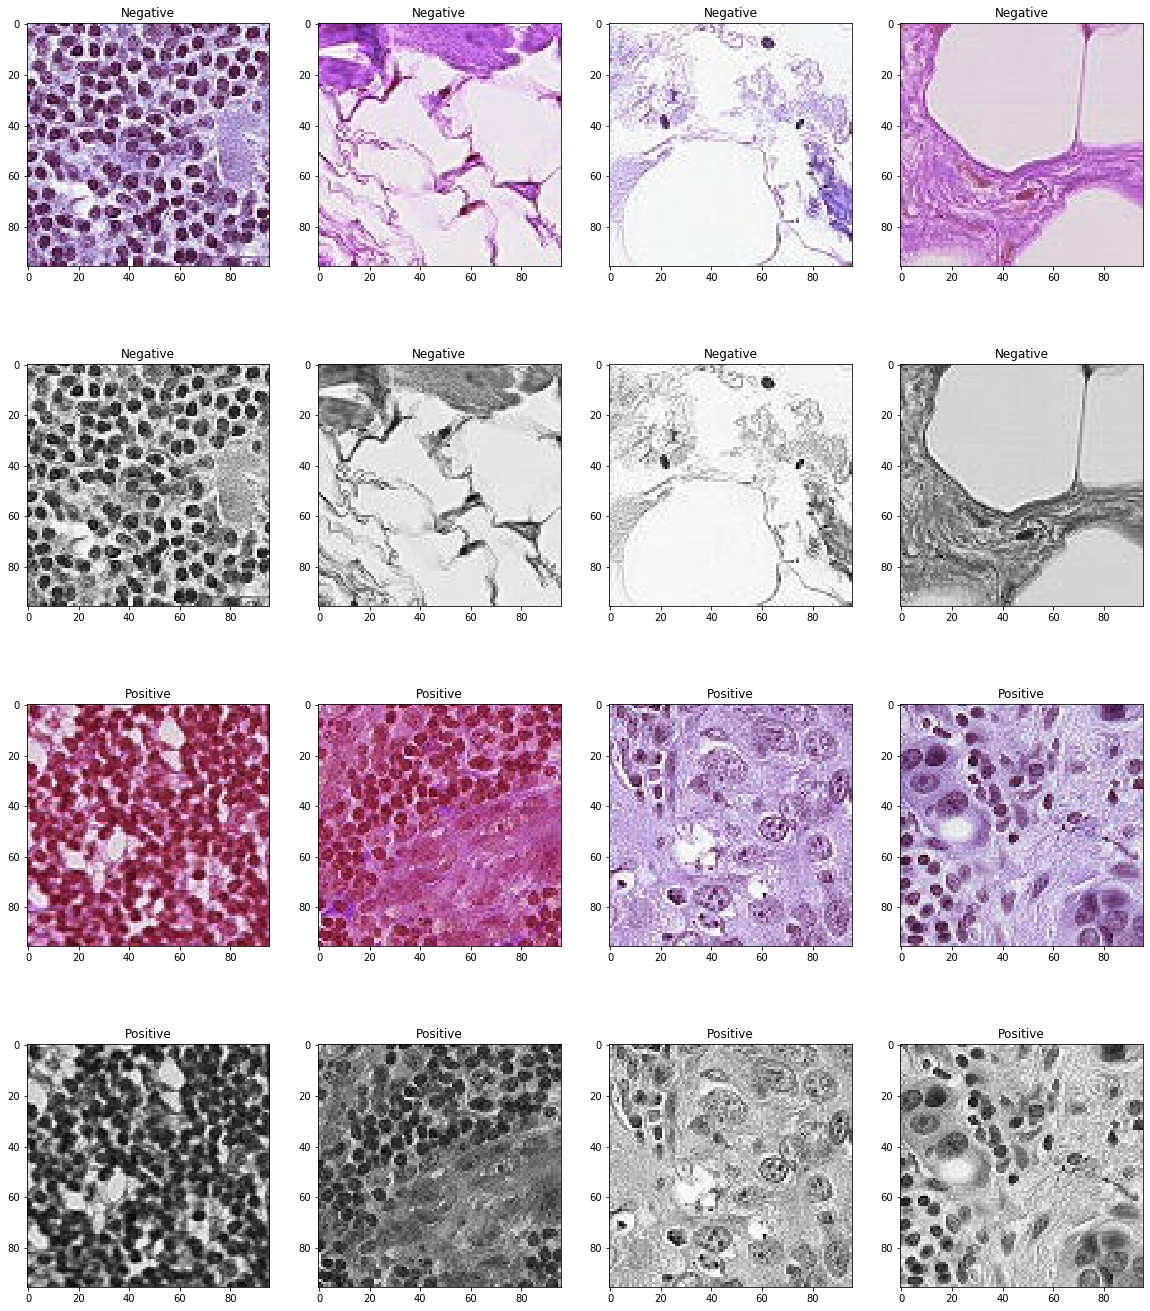

In [3]:
#select 8 at random
shuffled_y=shuffle(y)

fig,ax = plt.subplots(4,4, figsize=(20,24))

#4 negatives
for i, idx in enumerate(shuffled_y[shuffled_y['label'] == 0]['id'][:4]):
    ax[0,i].imshow(X.get(idx))
    ax[0,i].set_title('Negative')
    
#4 negatives grayscale
for i, idx in enumerate(shuffled_y[shuffled_y['label'] == 0]['id'][:4]):
    ax[1,i].imshow(X_gray.get(idx), cmap='gray')
    ax[1,i].set_title('Negative')
    
#4 positives
for i, idx in enumerate(shuffled_y[shuffled_y['label'] == 1]['id'][:4]):
    ax[2,i].imshow(X.get(idx))
    ax[2,i].set_title('Positive')
    

#4 positives grayscale
for i, idx in enumerate(shuffled_y[shuffled_y['label'] == 1]['id'][:4]):
    ax[3,i].imshow(X_gray.get(idx), cmap='gray')
    ax[3,i].set_title('Positive')
  

##### To begin looking for trends in the data, first we'll split into positive and negative groups in advance of plotting some features


In [4]:
y_pos=y[y.label == 1]
y_neg=y[y.label == 0]

In [5]:
X_pos=X.copy()
X_pos_vect=X_vect.copy()
X_pos_gray=X_gray.copy()
for idx,row in y_neg.iterrows():
    X_pos.pop(row['id'])
    X_pos_gray.pop(row['id'])
    X_pos_vect.pop(row['id'])

X_neg=X.copy()
X_neg_gray=X_gray.copy()
X_neg_vect=X_vect.copy()
for idx,row in y_pos.iterrows():
    X_neg.pop(row['id'])
    X_neg_gray.pop(row['id'])
    X_neg_vect.pop(row['id'])


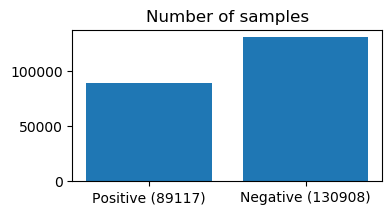

In [6]:
samples=[len(X_pos),len(X_neg)]

fig = plt.figure(figsize=(4, 2),dpi=100)
plt.bar([1,0], [len(X_neg),len(X_pos)])
plt.xticks([1,0],["Negative ({})".format(len(X_neg)),"Positive ({})".format(len(X_pos))])
plt.title("Number of samples")
plt.show()

##### First of all, we can notice that the training data contains about 60% negative and 40% positive samples.


The dataset is made up of images, so a few ways of exploring the data come to mind:
* intensity of each of the color channels
* aggregations of the channels


In [7]:
X_pos_l=list(X_pos.values())
X_neg_l=list(X_neg.values())
X_pos_vect_l=list(X_pos_vect.values())
X_neg_vect_l=list(X_neg_vect.values())

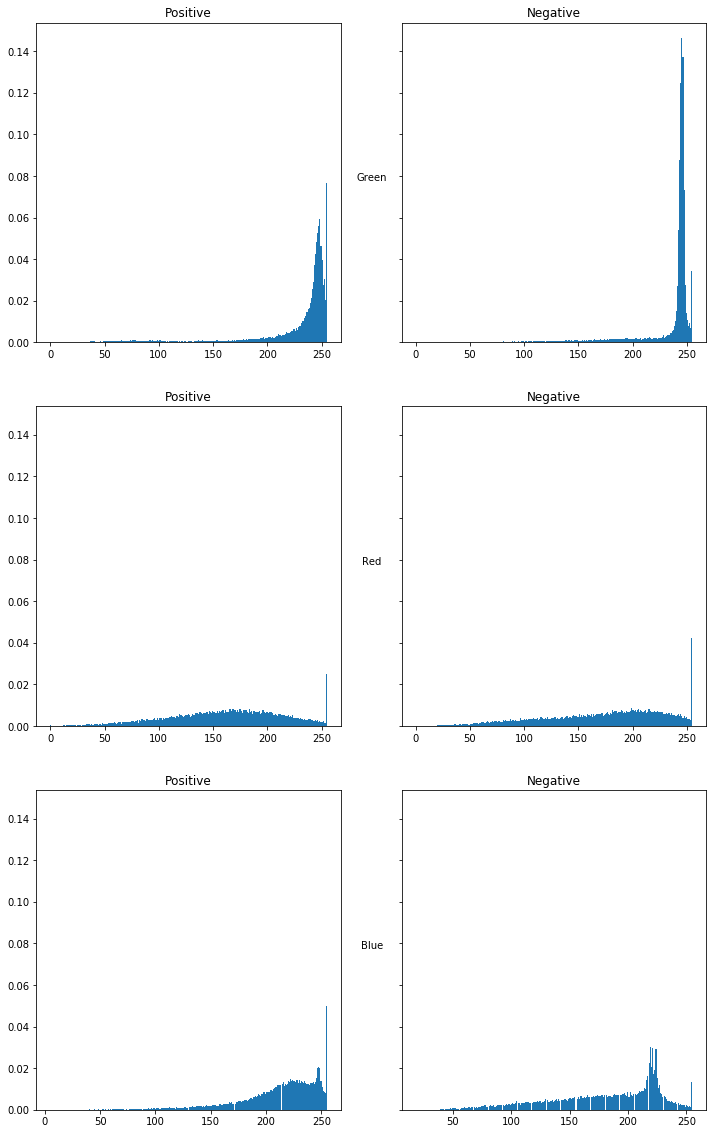

In [8]:
fig,ax = plt.subplots(3,2,sharey=True,figsize=(12,20))

#histogram with 256 bins because 256 possible values
ax[0,0].hist(X_pos_l[:][:][:][0].flatten(),density=True,bins=256)
ax[0,1].hist(X_neg_l[:][:][:][0].flatten(),density=True,bins=256)
ax[1,0].hist(X_pos_l[:][:][:][1].flatten(),density=True,bins=256)
ax[1,1].hist(X_neg_l[:][:][:][1].flatten(),density=True,bins=256)
ax[2,0].hist(X_pos_l[:][:][:][2].flatten(),density=True,bins=256)
ax[2,1].hist(X_neg_l[:][:][:][2].flatten(),density=True,bins=256)

ax[0,0].set_title("Positive")
ax[0,1].set_title("Negative")
ax[1,0].set_title("Positive")
ax[1,1].set_title("Negative")
ax[2,0].set_title("Positive")
ax[2,1].set_title("Negative")

ax[0,1].set_ylabel("Green",rotation='horizontal',labelpad=30)
ax[1,1].set_ylabel("Red",rotation='horizontal',labelpad=30)
ax[2,1].set_ylabel("Blue",rotation='horizontal',labelpad=30)

plt.show()

#### We can begin to see a difference in the distribution of color between positive and negative samples. Among the Positive group we see:
* Slight differece in the green channel
* The red channel is a little darker
* More blue values are clustered around the brighter end, negative has more uniform distribution

#### Also worth noting is the spike at the value '256' in every channel. This corresponds to the whitespace in the images (white is (256,256,256)).
#### Next we will examine the results of some aggregation to see if there is anything we can learn there.

First, lets process the grayscale images as above

In [13]:
X_pos_gray_l=list(X_pos_gray.values())
X_neg_gray_l=list(X_neg_gray.values())
X_pos_gray_l=[np.ravel(each) for each in X_pos_gray_l]
X_neg_gray_l=[np.ravel(each) for each in X_neg_gray_l]

In [24]:
X_pos_gray_l[1]

array([224, 170, 156, ..., 233, 196, 220], dtype=uint8)

In [26]:
X_pos_gray_np=np.asarray(X_pos_gray_l)
X_neg_gray_np=np.asarray(X_neg_gray_l)

In [ ]:
#plot grayscale
fig,axs = plt.subplots(2,2,sharey=True,figsize=(12,20))

axs[0,0].hist(X_pos_gray_np,density=True,bins=256)
axs[0,1].hist(X_neg_gray_np,density=True,bins=256)

axs[0,0].set_title("Positive")
axs[0,1].set_title("Negative")
#ax[0,1].set_ylabel("Green",rotation='horizontal',labelpad=30)

plt.show()

In [18]:
#create some aggregates of the data
X_pos_mean=[np.mean(each) for each in X_pos_vect_l]
X_neg_mean=[np.mean(each) for each in X_neg_vect_l]
X_pos_med=[np.median(each) for each in X_pos_vect_l]
X_neg_med=[np.median(each) for each in X_neg_vect_l]

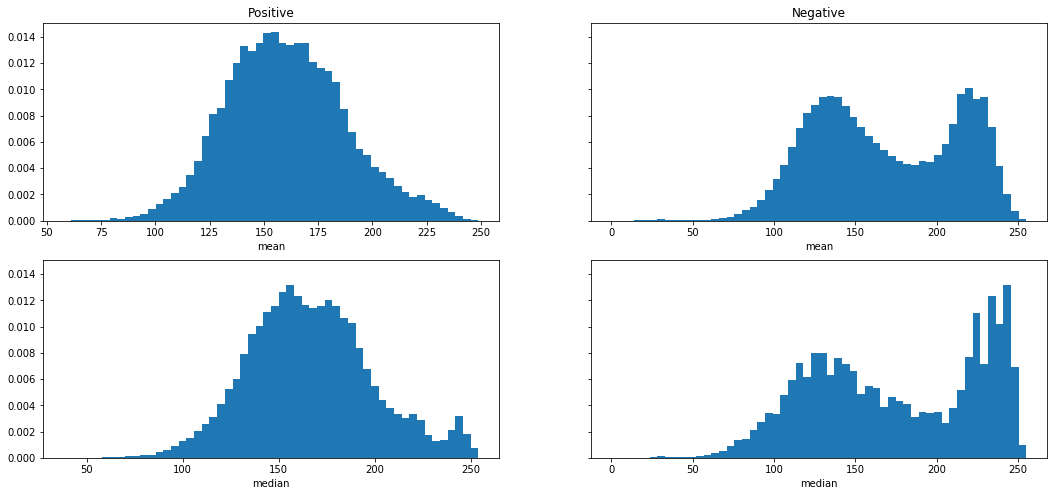

In [25]:
fig,axs = plt.subplots(2,2, sharey=True, figsize=(18,8))

axs[0,0].hist(X_pos_mean,bins=54,density=True)
axs[0,1].hist(X_neg_mean,bins=54,density=True)
axs[1,0].hist(X_pos_med,bins=54,density=True)
axs[1,1].hist(X_neg_med,bins=54,density=True)

axs[0,0].set_title("Positive")
axs[0,1].set_title("Negative")
axs[0,0].set_xlabel("mean")
axs[0,1].set_xlabel("mean")
axs[1,0].set_xlabel("median")
axs[1,1].set_xlabel("median")

plt.show()

###### There is a clear difference in the distribution of the mean values of the positive and negative sets.

Are there any other differences, maybe between aggregates of color channels? 
Is difference in the distribution of the mean values of the images related to the differences in the distribution of colors noted above?

In [9]:
X_pos_grn=X_pos_l[:][:][:][0]
X_pos_grn_mean=[np.mean(np.ravel(each)) for each in X_pos_grn]
X_pos_blu=X_pos_l[:][:][:][1]
X_pos_blu_mean=[np.mean(np.ravel(each)) for each in X_pos_blu]
X_pos_red=X_pos_l[:][:][:][2]
X_pos_red_mean=[np.mean(np.ravel(each)) for each in X_pos_red]
X_neg_grn=X_neg_l[:][:][:][0]
X_neg_grn_mean=[np.mean(np.ravel(each)) for each in X_neg_grn]
X_neg_blu=X_neg_l[:][:][:][1]
X_neg_blu_mean=[np.mean(np.ravel(each)) for each in X_neg_blu]
X_neg_red=X_neg_l[:][:][:][2]
X_neg_red_mean=[np.mean(np.ravel(each)) for each in X_neg_red]

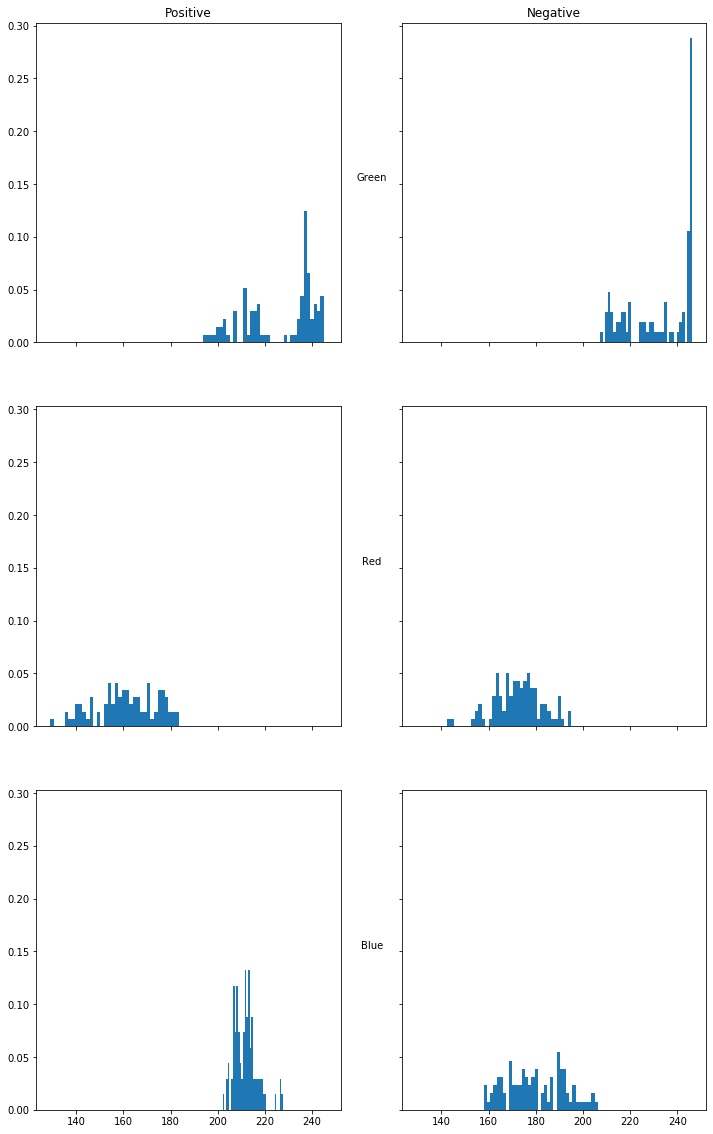

In [10]:

fig,ax = plt.subplots(3,2, sharey=True, sharex=True,figsize=(12,20))

ax[0,0].hist(X_pos_grn_mean,density=True,bins=36)
ax[0,1].hist(X_neg_grn_mean,density=True,bins=36)
ax[1,0].hist(X_pos_blu_mean,density=True,bins=36)
ax[1,1].hist(X_neg_blu_mean,density=True,bins=36)
ax[2,0].hist(X_pos_red_mean,density=True,bins=36)
ax[2,1].hist(X_neg_red_mean,density=True,bins=36)

ax[0,0].set_title("Positive")
ax[0,1].set_title("Negative")
ax[0,1].set_ylabel("Green",rotation='horizontal',labelpad=30)
ax[1,1].set_ylabel("Red",rotation='horizontal',labelpad=30)
ax[2,1].set_ylabel("Blue",rotation='horizontal',labelpad=30)
#ax[3,1].set_ylabel("Grayscale",rotation='horizontal',labelpad=30)

plt.show()

Noticeable difference in the blue channel with most values clustering around 210 in the positive group only. Also slightly noticeable difference in the red channel. These seem to echo the results in the